In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [32]:
# Need to get make sure the data being read from GitHub is in "raw" form
hitters = pd.read_csv("https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv")

In [37]:
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [34]:
len(hitters)

322

In [36]:
# Since we are going to be predicting Salary based on other numeric predictors, we need to remove all of the values where Salary = NA
hit = hitters.dropna(subset = ['Salary'])
len(hit)

263

In [55]:
# because we only want to work with numeric values, we need to remove these four columns. 
# we could make these categorical values numeric by changing them to dummy variables, but not doing that now.
hit_F = hit.drop(columns = ['Unnamed: 0', 'League', 'Division', 'NewLeague'])
hit_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    int64  
 1   Hits     263 non-null    int64  
 2   HmRun    263 non-null    int64  
 3   Runs     263 non-null    int64  
 4   RBI      263 non-null    int64  
 5   Walks    263 non-null    int64  
 6   Years    263 non-null    int64  
 7   CAtBat   263 non-null    int64  
 8   CHits    263 non-null    int64  
 9   CHmRun   263 non-null    int64  
 10  CRuns    263 non-null    int64  
 11  CRBI     263 non-null    int64  
 12  CWalks   263 non-null    int64  
 13  PutOuts  263 non-null    int64  
 14  Assists  263 non-null    int64  
 15  Errors   263 non-null    int64  
 16  Salary   263 non-null    float64
dtypes: float64(1), int64(16)
memory usage: 47.0 KB


In [127]:
y = hit_F.Salary
X = hit_F.drop(columns = ['Salary'])
#plt.scatter(y, X.HmRun)
#plt.scatter(y, X.Runs)

# 1.1 - LASSO Regression

In [159]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
np.random.seed(0)

In [167]:
alphas = 10**np.linspace(10,-2,50)*0.5
lassy = Lasso(normalize=True, max_iter=10000)
coefs = []


In [168]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.5)

Text(0, 0.5, 'weights')

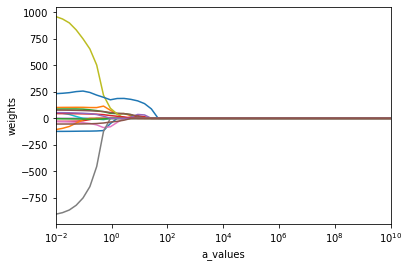

In [162]:
for i in alphas:
    lassy.set_params(alpha = i)
    lassy.fit(scale(X_train), y_train)
    coefs.append(lassy.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('a_values')
plt.ylabel('weights')

In [177]:
from sklearn.metrics import mean_squared_error
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lassy.set_params(alpha = lassocv.alpha_)
print('optimal regularization penalty: ',lassocv.alpha_)
#lassy.fit(X_train, y_train)
#mean_squared_error(y_test, lassy.predict(X_test))

optimal regularization penalty:  2.3604245378429947


In [176]:
lasso1 = Lasso(max_iter=10000, normalize=True)

lasso1.fit(X, y)
pd.Series(lasso1.coef_, index=X.columns)

AtBat     -0.000000
Hits       1.943149
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      2.276171
Years     -0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.045672
CRuns      0.246671
CRBI       0.365230
CWalks     0.000000
PutOuts    0.223976
Assists   -0.000000
Errors    -0.000000
dtype: float64

There end up being six predictors left when using the cross validation method.

In [178]:
lasso = Lasso(alpha=10, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

The final 3 predictors that remain in the LASSO regression model are Runs,  CRBI and CRuns.

# 1.2 - Ridge Regression

In [179]:
from sklearn.linear_model import Ridge, RidgeCV

Text(0.5, 1.0, 'Ridge Coefficients Trajectory')

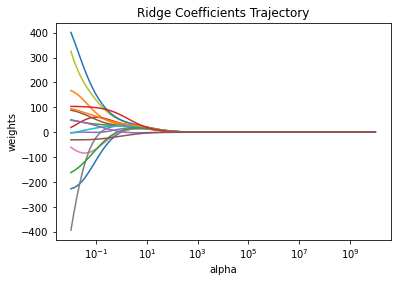

In [182]:
ridge = Ridge(normalize = True)
coefs_R = []

alphas_Ridge = 10**np.linspace(10,-2,100)*0.5

for h in alphas_Ridge:
    ridge.set_params(alpha = h)
    ridge.fit(scale(X_train), y_train)
    coefs_R.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas_Ridge*2, coefs_R)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Coefficients Trajectory')

In [186]:
ridgecv = RidgeCV(alphas = alphas_Ridge, scoring='neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha = ridgecv.alpha_)
print('optimal regularization penalty : ',ridgecv.alpha_)

optimal regularization penalty :  1.004616501282523


# Short Answer

The bias-variance tradeoff is a result from predictive model fitting. There is a "tradeoff" between model fitting. Ideally, our model would have low bias and low variance but that is not possible with both properties competing against each other. Thus, the bias-variance tradeoff works as such: when there is high bias, there is low variance; and vice vesa. 

Regularization is used to better fit regression models by increasing bias and lowering variance. Having a high variance and low bias causes a result over overfitting which is very bad when trying to create a predictive model.

Looking at the two models (LASSO and Ridge) created in number 1, we can observe both models have an rather large optimal regularization penalty. The Ridge penalty is not as large as the LASSO penalty, but these larger values mean that they are outperforming least-squares regression. This means that these models are doing a better job at lowering the variance and increasing the bias. 